In [1]:
from sklearn.datasets import load_wine # wine dataset 로드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
        
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
X=wine['data'] # 178 X 13개의 데이터(2차원)
y=wine['target'] # class 0,1,2 합 178개의 1차원 데이터

In [3]:
X.shape, y.shape

((178, 13), (178,))

In [4]:
wine['target_names'] # class 0,1,2  세가지의 output

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
import sklearn
import pandas as pd
from sklearn.datasets import load_wine
raw_data = load_wine()
features, target = load_wine(return_X_y=True)

#since my raw data are a dictionary, I want to extract my features' names
names=raw_data['feature_names']
df=pd.DataFrame(features)
df.columns=names

In [38]:
from sklearn.decomposition import PCA 
pca = PCA(2)  
pca_df = pca.fit_transform(features)
print(features.shape)
print(pca_df.shape)

(178, 13)
(178, 2)


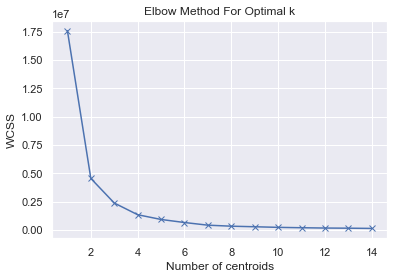

In [44]:
from sklearn.cluster import KMeans  # elbow
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

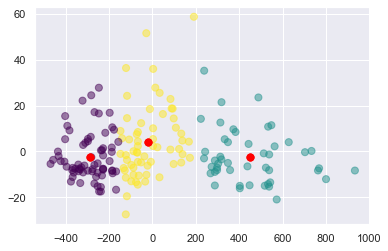

In [45]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_df)  # k-Means Clustering
y_kmeans = kmeans.predict(pca_df)
plt.scatter(pca_df[:,0], pca_df[:,1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

# 결과

이 데이터는 같은 지역에서 재배된 와인을 화학적으로 분석한 결과다.

이탈리아의 세 곳에서 다른 경작자만든 와인들이고, 13차원의 input data.

와인의 세 가지 유형에서 발견된 13가지 성분들에 대해 측정한 값

- 그룹의 수가 3개로 정해져 있고, 그룹마다 각각 13가지의 차이점이 있다.
    - 따라서 k-means 방법을 이용한다.(클러스터 수 3)
    
PCA를 통해 와인의 13가지 특성을 2차원으로 축소시키고, elbow방법으로 적절한 클러스터의 수를 조사했을 때 예상과 같이 3개의 클러스터 수가 적절함을 알 수 있다.

비지도학습을 통해 각 지역에서 생산하는 와인의 특성을 분류하고 그 와인의 원산지를 분류할 수 있다. 